# Redes Neuronales Convolucionales

Uno de los componentes clave de la mayoría de las aplicaciones de visión artificial basadas en el aprendizaje profundo es la red neuronal convolucional (CNN). Inventadas en la década de 1980 por el pionero del aprendizaje profundo Yann LeCun, las CNN son un tipo de red neuronal que es eficiente para capturar patrones en espacios multidimensionales. Esto hace que las CNN sean especialmente buenas para imágenes, aunque también se usan para procesar otros tipos de datos.


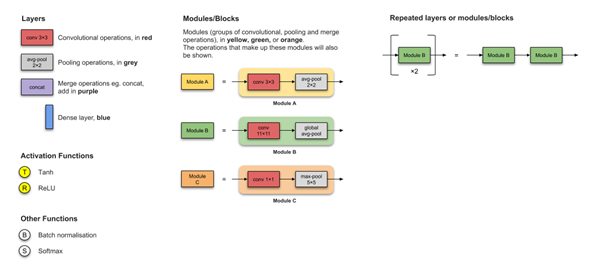

## Red lenet 5

Lenet-5 es uno de los primeros modelos preentrenados propuestos por Yann LeCun y otros en el año 1998, en el artículo de investigación Gradient-Based Learning Applied to Document Recognition. Utilizaron esta arquitectura para reconocer los caracteres escritos a mano e impresos a máquina.

La red tiene 5 capas con parámetros de aprendizaje y, por lo tanto, se llama Lenet-5. Tiene tres conjuntos de capas de convolución con una combinación de agrupación promedio. Después de las capas de convolución y agrupación promedio, tenemos dos capas completamente conectadas. Por último, un clasificador Softmax que clasifica las imágenes en la clase respectiva.


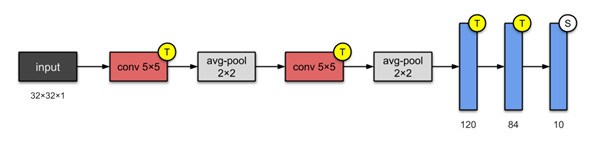

## Red Alexnet

Desde el año 2010, el proyecto ImageNet ha lanzado anualmente un concurso de reconocimiento de imágenes, ILSVRC –ImageNet Large Scale Visual Recognition Challenge-. Uno de los parámetros utilizados para medir el éxito de los concursantes es el error de las cinco primeras (top-5 error). La red debe proponer cinco etiquetas diferentes a cada imagen. Si ninguna de ellas se corresponde con su descripción, se considera que se ha producido un fallo. Con el objetivo de batir el récord existente hasta entonces (top-5 error del 25%), en el año 2012, Alex Krizhevsky propuso, junto con su director de tesis Geoffrey Hinton, un nuevo modelo de red convolucional que logró reducir ese porcentaje hasta el 17%. Este nuevo modelo se conocería como AlexNet.

[Mas informacion](https://lamaquinaoraculo.com/computacion/alexnet/)


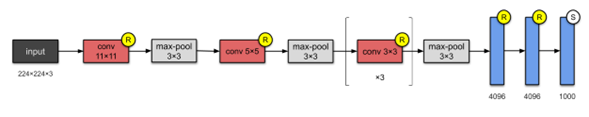

## Red VGG 16



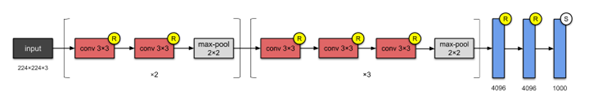

## Red Inception

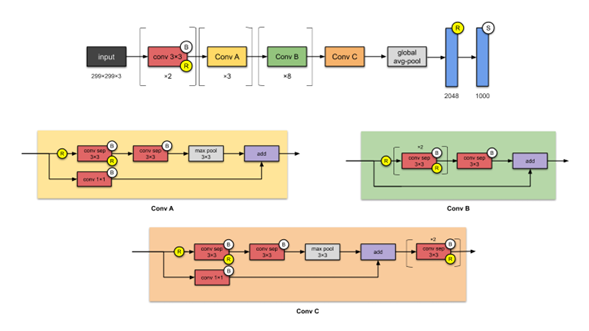

## Red ResNet50

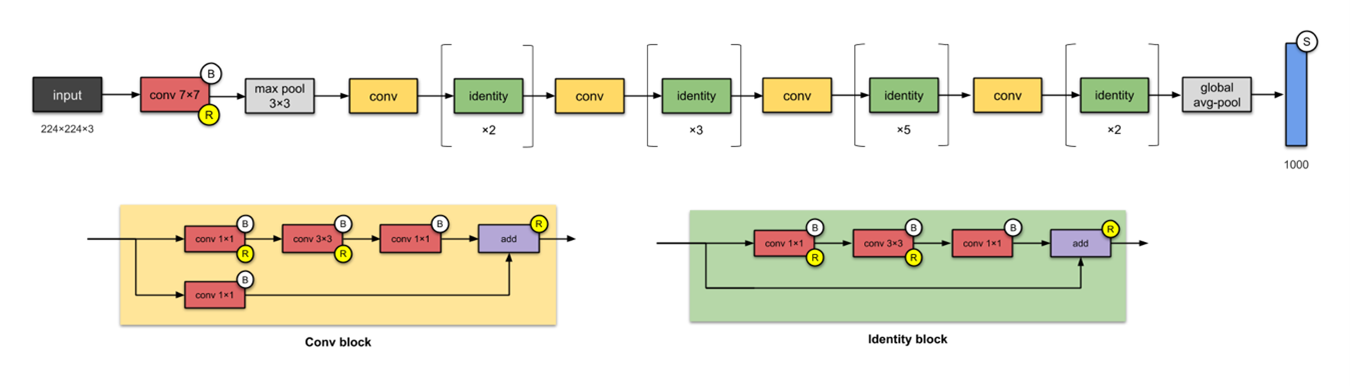

## Ejemplo de red Alexnet

Primero en el codigo iniciamos importando las librerias que necesito para jalar las imagenes de la base de datos, imprimir resultados y graficas, y para la manipulacion de las imagenes.

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
import argparse
from imutils import paths
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")

Despues estan las librerias y modulos que utilizo para armar las partes de la red. Para mi es importante agregar la parte del tensorflow antes de keras porque utilizo mi GPU para agilizar mis resultados. 

La parte de sklearn es la que me permite manipular mi base de datos para dividir los datasets en entrenamiento y prueba.

In [ ]:
# Importar los paquetes de keras y tensorflow
from tensorflow.keras import backend as K
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Los valores siguientes los utilizo porque corro este programa directo desde mi consola, por lo que es necesario indicarle donde va a tomar las imagenes y donde quiero que guarde los resultados de mi entrenamiento.

In [ ]:

#Aqui es exclusivo esto si utilizan la consola para correr su programa
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True, help="direccion del dataset")
ap.add_argument("-p", "--plot", type=str, default="plot.png", help="Nombre del Plot")
args = vars(ap.parse_args())

Estos siguientes parametros son muy importantes cuando estamos tomando en cuenta la capacidad computacional de nuestra maquina.

- `INIT_LR`: Este valor es la inicializacion que le doy al learning rate para que no se vaya tan alto al iniciar el entrenamiento. Esto lo agregue a partir de la red VGG16, cuando en lugar de iniciar con un valor cercano a 0, era un valor cercano al 10.

- `BS`: Este parametro se llama batch size, y se modifica dependiendo de la capacidad de tu computadora. El batchsize es un término utilizado en el aprendizaje automático y se refiere a la cantidad de ejemplos de entrenamiento utilizados en una iteración. El numero que elijas debe depender del numero de epochs que tengas y el tamano del dato de entrada.

- `Epochs`: Una época es cuando un conjunto de datos COMPLETO se pasa hacia adelante y hacia atrás a través de la red neuronal solo UNA VEZ. Dado que una época es demasiado grande para alimentar a la computadora a la vez, la dividimos en varios lotes más pequeños.

In [ ]:
#Parametros que dependen de la capacidad computacional
INIT_LR = 0
BS = 16
EPOCHS = 20

Hg = 400
Lng = 160

Modificacion de la base de datos y division de los datasets que voy a utilizar en la etapa de entrenamiento y prueba.

In [ ]:
print("[INFO] Cargando imagenes...")
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (Hg, Lng))
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float") / 255.0

le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np_utils.to_categorical(labels, 2)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)


train_datagen = ImageDataGenerator(rotation_range=20, 
                            zoom_range=0.15, 
                            width_shift_range=0.2,  
                            height_shift_range=0.2,
                             shear_range=0.15, 
                             horizontal_flip=True,
                             vertical_flip = True,
                             brightness_range=None,
                            zca_whitening=False,
                            zca_epsilon=1e-06,
                             fill_mode="nearest")
l2_reg=0
weights=None


Arquitectura de la red Alexnet. Los pesos de las neuronas fueron modificados ya que el procesamiento era muy grande para mi computadora y la cantidad de imagenes que manejo.

In [ ]:

#Start model Alexnet
model = Sequential()
model.add(Conv2D(16, (11, 11), input_shape=(Lng, Hg, 3),
        padding='same', kernel_regularizer=l2(INIT_LR)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(36, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Layer 5
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Layer 8
model.add(Dense(2))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))



Pasamos a la parte en donde compilamos el modelo. Aqui es donde decidimos el tipo de perdida que vamos a elegir. Dependiendo de tus datos puedes elegir distintos valores.

En la pagina oficial de keras podemos encontrar todas las perdidas que podemos usar, para que sirven y ejemplos en donde mejor se utilizan. [KERAS](https://keras.io/api/losses/)

Otros ejemplos mas detallados con codigo de perdidas: [Neptune.blog](https://neptune.ai/blog/keras-loss-functions)


Para la parte de optimizadores, Adam es uno de los mas populares para la clasificacion de imagenes, sin embargo la libreria de Keras cuenta con muchos otros mas que podemos utilizar. 

Guia para optimizadores: [guia](https://analyticsindiamag.com/guide-to-tensorflow-keras-optimizers/)
Pagina oficial de Keras: [Optimizadores keras](https://keras.io/api/optimizers/)

Las metricas en Keras tambien es un factor a tomar en cuenta. Por lo general se utiliza el accuracy, pero existen muchas otras. [Keras metricas](https://keras.io/api/metrics/)



In [ ]:
model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["acc"])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
# Train 
print("[INFO] Tr {} epochs...".format(EPOCHS))
H = model.fit_generator(train_datagen.flow(trainX, trainY, batch_size=BS), 
                                    validation_data=(testX, testY), callbacks=[reduce_lr], 
                                    validation_steps = 1000,
                                    steps_per_epoch=1000, 
                                    epochs=EPOCHS)



Esta siguiente parte se utiliza para la parte de predicciones. Una ves que realicemos nuestro reporte de exactitud, podemos guardar nuestro modelo para poder utilizarlo en nuevas imagenes.

In [ ]:
# Evaluate 
print("[INFO] Evaluating network...")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=le.classes_))
model.save('alexnet_01_DIBalance.h5')



Por ultimo tenemos la parte en donde vamos a imprimir las imagenes de los resultados de exactitud y perdida del modelo en todas las iteraciones de entrenamiento y prueba.

In [ ]:
# Plot 
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_accuracy")
plt.plot(N, H.history["val_acc"], label="val_accuracy")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])